In [1]:
library(corrplot)

corrplot 0.84 loaded



* Читаем данные из файла var_17.csv

In [2]:
data <- read.csv('var_17.csv',header = T)
head(data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,697.8151,748.3053,114.9966,326.1508,474.7454,811.9121,796.0717,614.1673,888.7834
2,700.0508,698.9777,109.2521,320.4529,469.6965,811.6439,824.0816,620.0068,889.4032
3,707.1942,717.8768,108.0847,332.4016,474.5877,811.5267,830.9397,631.8992,882.3817
4,700.9369,849.4632,127.4051,336.5804,495.2919,815.0317,827.9125,619.2083,884.7094
5,705.0451,857.8881,130.7538,322.9464,497.5869,823.2750,830.2996,608.8431,919.4383
6,714.9202,896.0992,137.1830,331.2853,507.6126,828.4692,842.5520,598.5782,940.9948


* Переход к доходности по формуле

In [4]:
(ncol <- dim(data)[2])
(nrow <- dim(data)[1])

[1] 9

[1] 201

In [5]:
stocks <- data[,2:ncol]
rates <- stocks[2:nrow,] / stocks [1:(nrow -1),] - 1

* Вывод графика доходностей

function (object, ...) 
UseMethod("summary")
<bytecode: 0x7f89439fd718>
<environment: namespace:base>

[1] 8 8

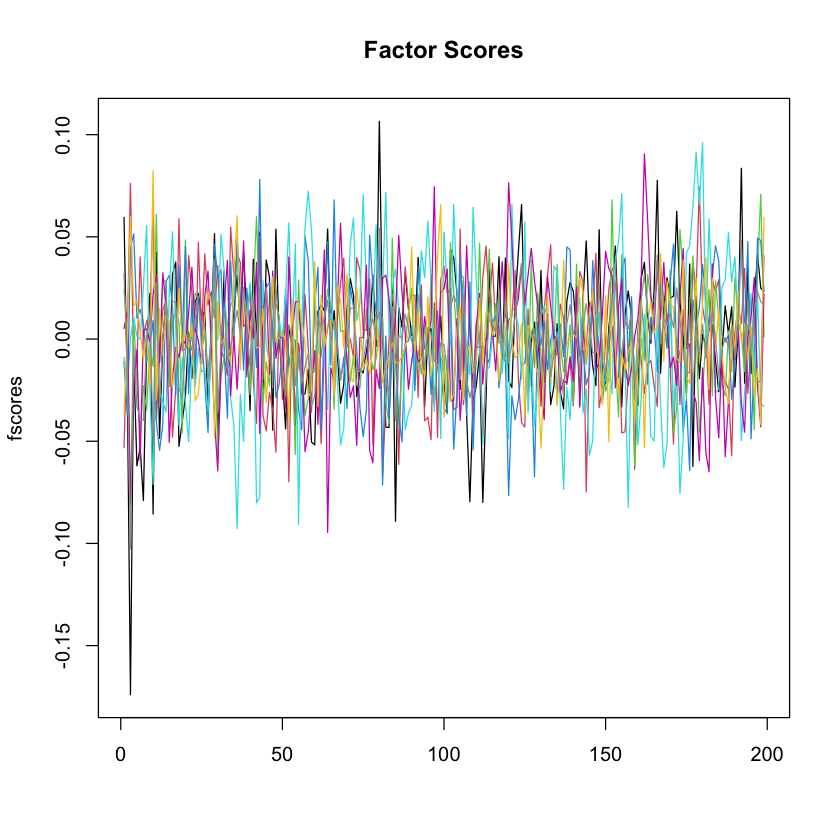

In [6]:
rates <- rates[1:(nrow-2),]
pca <- prcomp(rates, scale = TRUE)
summary
tot <- pca$sdev
dim(pca$rotation)
scores <- function(ldata,V10,number)
{ 
  cdata <- ldata
  m <- dim(ldata)[2]
  for (i in 1:m) 
    cdata[,i] <- ldata[,i] - pca$center[i]
  loads <- pca$rotation[,1:number]
  cdata <- as.matrix(cdata)
  f <- cdata %*% loads
  return (f)
}
number <- 8
fscores <- scores(rates,V9,number)
matplot(fscores,type = 'l',lty = 1, col = 1:number, main = 'Factor Scores')

* К доходностям метод главных компонент

In [7]:
stocks <- data[,2:ncol]
rates <- stocks[2:nrow,] / stocks [1:(nrow-1),] - 1
head(rates)

,V2,V3,V4,V5,V6,V7,V8,V9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,-0.065918967,-0.04995376,-0.01747012,-0.010634844,-0.0003302165,0.035185182,0.0095079563,0.0006973073
3,0.027038192,-0.01068530,0.03728676,0.010413499,-0.0001444770,0.008322160,0.0191810820,-0.0078946507
4,0.183299338,0.17875232,0.01257153,0.043625662,0.0043190621,-0.003643111,-0.0200837521,0.0026380278
5,0.009917911,0.02628385,-0.04050718,0.004633517,0.0101140597,0.002883293,-0.0167393857,0.0392545694
6,0.044540906,0.04917054,0.02582108,0.020148786,0.0063092020,0.014756587,-0.0168597373,0.0234453058
7,0.067953196,0.08452813,-0.01597065,0.009997718,-0.0066140499,0.009933852,-0.0002281378,-0.0279628253


* Построение графика стандартных отклоненией

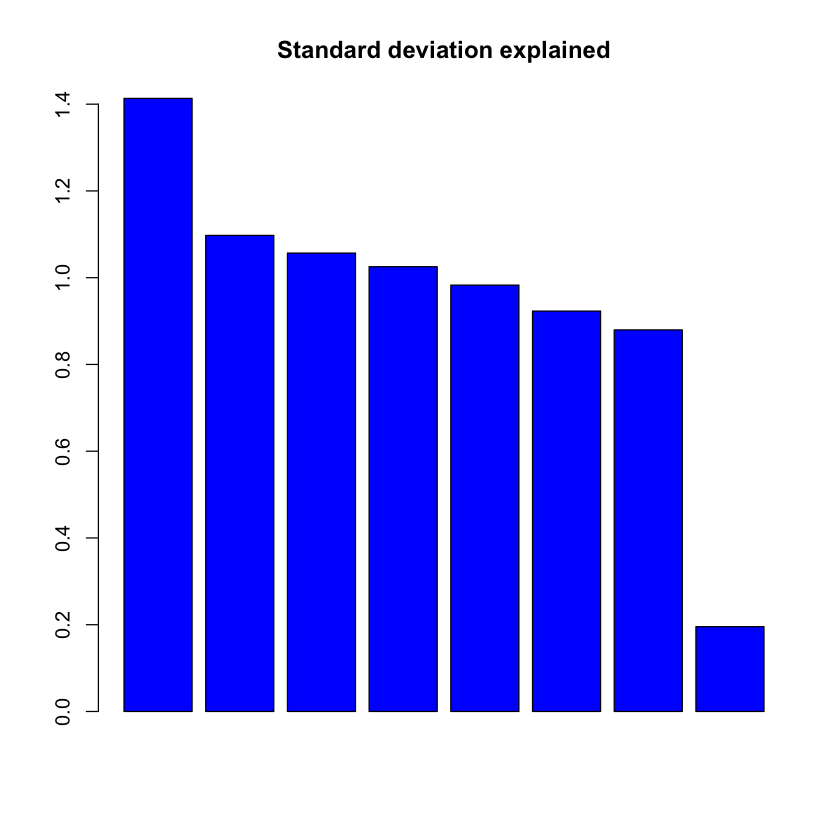

In [8]:
mp <- barplot(pca$sdev,main = "Standard deviation explained", col = "blue")

* Построение графика важности каждой главной компоненты

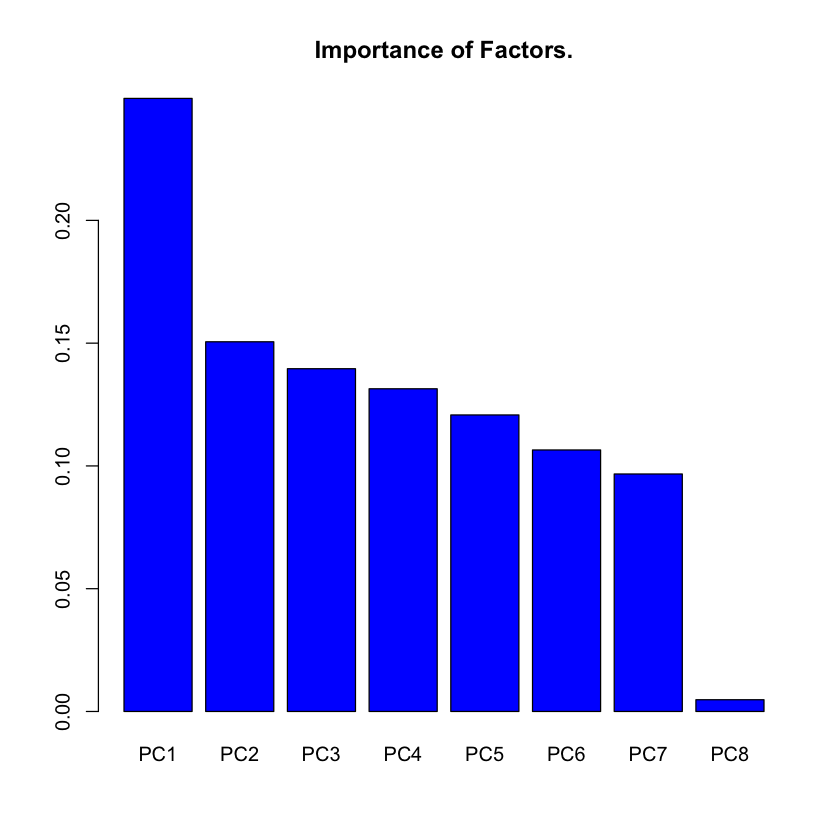

In [9]:
ss <- summary(pca)
mp <- barplot(ss$importance[2,],main = "Importance of Factors.", col = "blue")

Гипотеза - 1 компонента является самой важной
это еще подтвердим или оправергнем далее 

* Построение графика накопленной меры информативности
* Определение сколько главных факторов объясняют более 80% дисперсии

Warning message in cbind(ss$importance[3, ], his):
“number of rows of result is not a multiple of vector length (arg 1)”


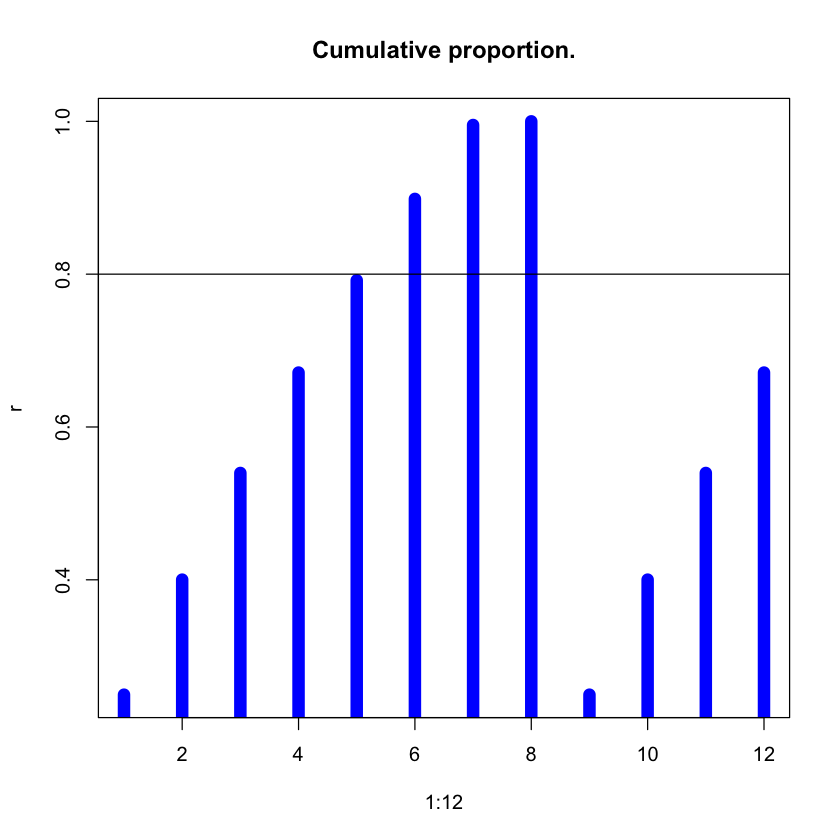

In [10]:
his <- ss$importance[3,]
his[1:12]<- NA
r <- as.matrix(cbind(ss$importance[3,],his))
mp <- matplot(1:12,r,type = 'h',lty = 1, lwd = 10,main = "Cumulative proportion.", col = c("blue",'red'))
abline(h = 0.8,col = 'black')

4 главных фактора объясняют более 80% дисперсии 

* Ответ на вопрос : С доходностями какой акции 1 главный фактор максимально коррелирует?

[1]  0.0104380194  0.0038384539 -0.0034196583  0.0012936046  0.0017810794
[6]  0.0025791157  0.0007233106  0.0053549078

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
PC1,1.0000000,0.8176821,-0.8181299,0.5303434,0.53269223,0.7553230,0.35333373,0.9980097
PC2,0.8176821,1.0000000,-0.7796498,0.5590080,0.39886343,0.6257910,0.52509831,0.8149021
PC3,-0.8181299,-0.7796498,1.0000000,-0.4553085,-0.57911582,-0.6342992,-0.36435972,-0.8029534
PC4,0.5303434,0.5590080,-0.4553085,1.0000000,0.24967470,0.1553193,0.29051231,0.5384542
PC5,0.5326922,0.3988634,-0.5791158,0.2496747,1.00000000,0.3436022,-0.02330275,0.5418124
PC6,0.7553230,0.6257910,-0.6342992,0.1553193,0.34360224,1.0000000,0.33392171,0.7657721
PC7,0.3533337,0.5250983,-0.3643597,0.2905123,-0.02330275,0.3339217,1.00000000,0.3376851
PC8,0.9980097,0.8149021,-0.8029534,0.5384542,0.54181236,0.7657721,0.33768512,1.0000000


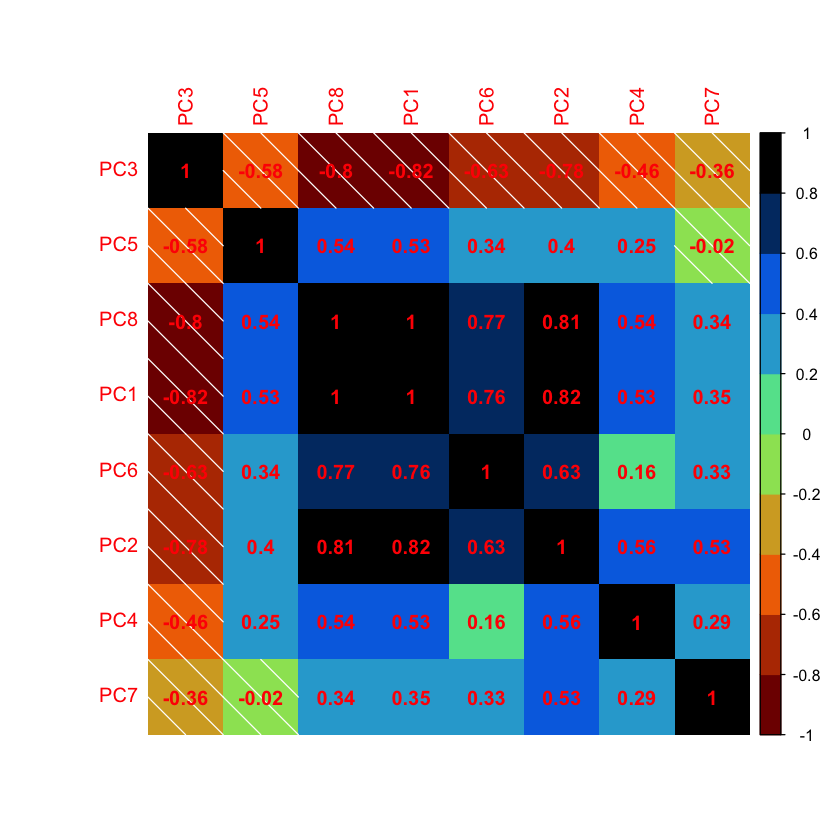

In [11]:
number <- 8
fscores <- scores(rates,ss,number)
means <- c(mean(fscores[,1]),mean(fscores[,2]),mean(fscores[,3]),mean(fscores[,4]),mean(fscores[,5]),mean(fscores[,6]),mean(fscores[,7]),mean(fscores[,8]))
means

fscores <- as.matrix(fscores)
cor(fscores)
cor_table <- cor(fscores)
col4 <- colorRampPalette(c("#7F0000","#FF7F00", "#7FFF7F", "#007FFF","#000000"))
corrplot(cor_table, method = "shade", col = col4(10), cl.length = 11, order = "AOE", addCoef.col = "red")

Для этого мы отобразили коэфеценты корреляции для PC1..PC8

Для визуализации использовали corrplot, видно, что PC1 вляеться главным фактором с максимальной корреляцией

* Получение главных факторов по определенному Вами числу

[1]  0.010438019  0.003838454 -0.003419658  0.001293605

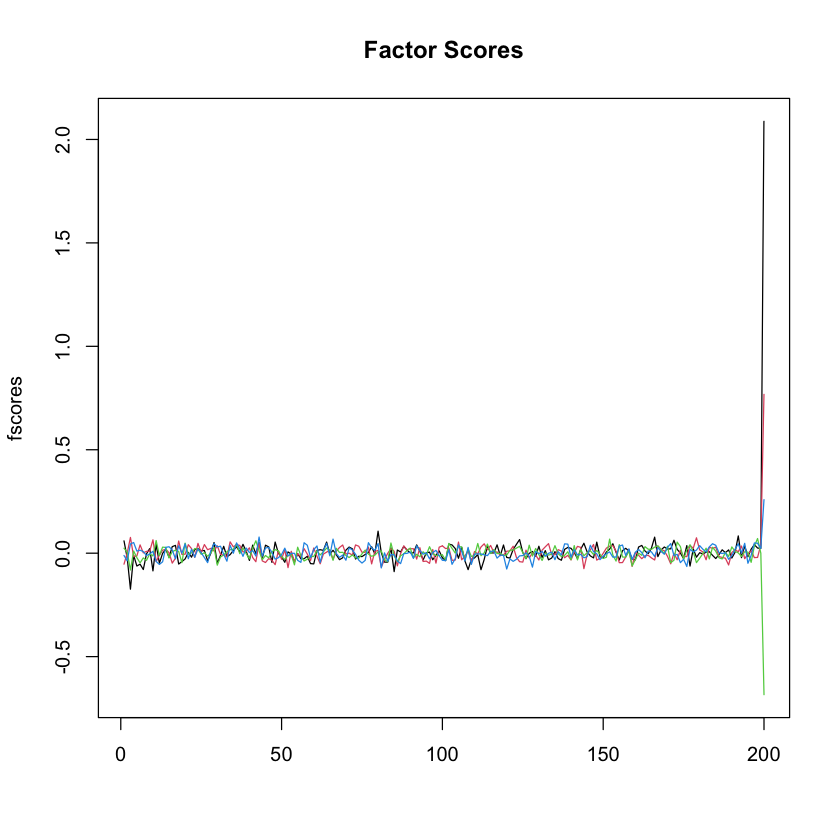

In [12]:
number <- 4
fscores <- scores(rates,ss,number)
matplot(fscores,type = 'l',lty = 1, col = 1:number,main = 'Factor Scores')
means <- c(mean(fscores[,1]),mean(fscores[,2]),mean(fscores[,3]),mean(fscores[,4]))
means

* Восстановим доходности этой акции по главным факторам и нагрузкам
* Построим график доходностей этой акции и восстановленых доходностей

In [15]:
tot <- ss$importance[2,]
rownames(ss$rotation)

[1] "V2" "V3" "V4" "V5" "V6" "V7" "V8" "V9"

[1] "V2" "V3" "V4" "V5" "V6" "V7" "V8" "V9"

,V2,V3,V4,V5,V6,V7,V8,V9
2,-0.044536282,-0.032789387,-0.009648163,-0.032162673,-0.019709569,0.027537075,0.01320153,0.028981426
3,0.007966873,0.006397482,0.028021198,0.019118561,-0.007308354,-0.002676277,0.02253395,-0.006768953
4,0.115052786,0.108840278,0.029703389,0.101638277,0.046642334,-0.032609749,-0.06941661,-0.046671780
5,0.006712432,0.008577199,-0.028285353,0.004162922,0.027023444,0.004788182,-0.02665115,0.029009448
6,0.025253201,0.035255713,0.018728751,0.042064438,0.013348130,0.012184755,-0.02310293,0.006815702
7,0.046955235,0.044110208,0.008081867,0.027965340,0.005623713,-0.016562272,-0.03458391,-0.034317690


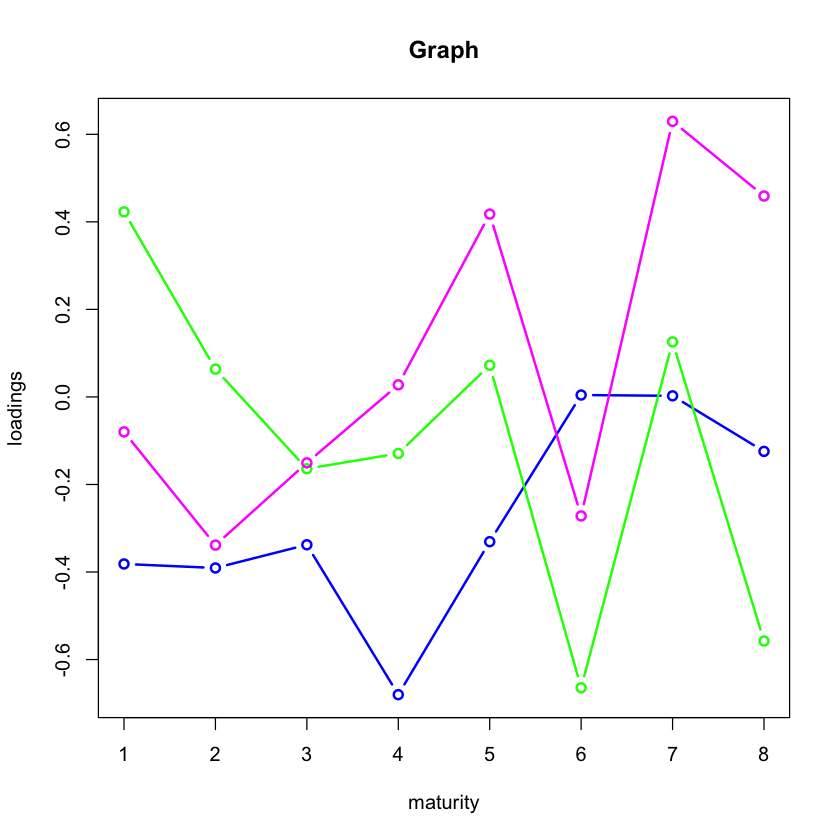

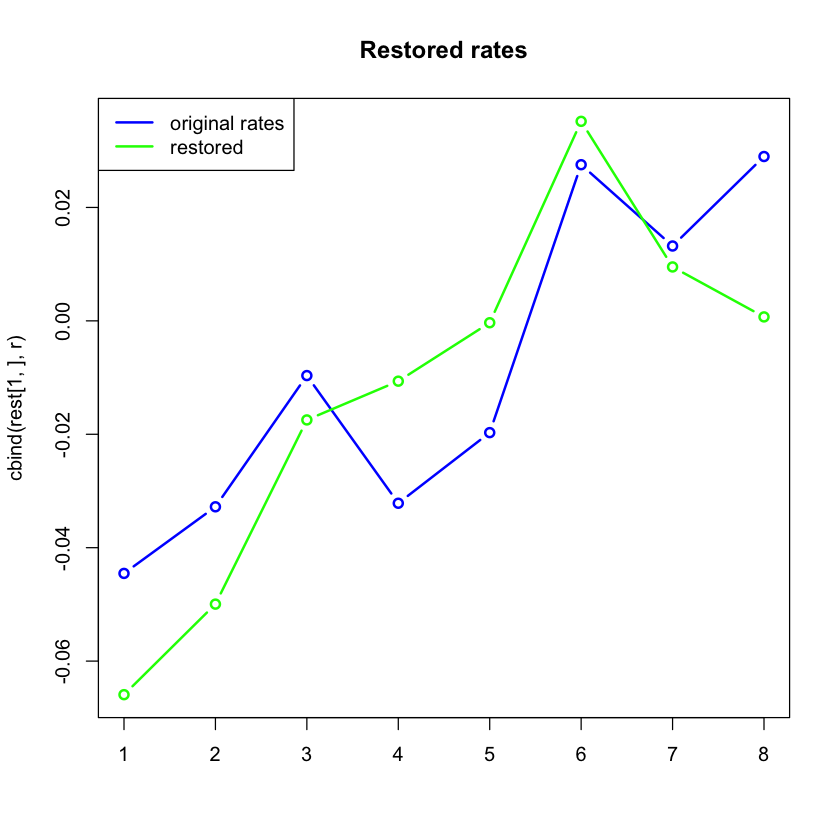

In [16]:
tot <- ss$importance[2,]
rownames(ss$rotation)
matplot(cbind(ss$rotation[,1],ss$rotation[,2],ss$rotation[,3]),type = 'b',pch=21,lwd = 2,
        col = c("blue","green","magenta"),main= "Graph",ylab = "loadings",xlab="maturity",lty=1 )
restoreData<- function(fscores,loadings,center)
{
  npca <- dim(fscores)[2]
  myeigen <- t(loadings[,1:npca])
  rest <- fscores %*%myeigen
  m <- length(center)
  if (m == dim(rest)[2])
  {
    for (i in 1:m)
      rest[,i] <- rest[,i]+center[i]
  }
  return(rest)
}
rest <- restoreData(fscores,pca$rotation,pca$center)
head(rest)
r <- unlist(rates[1,])
matplot(cbind(rest[1,],r),type ='b',pch=21,lwd = 2,main = 'Restored rates',col = c('blue','green'),lty = 1)
legend('topleft',c('original rates','restored'),lty=1,lwd=2,col=c('blue','green') )